## Dataset Reading and Pre-Processing steps

import required libraries

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
#Code to ignore warnings
import warnings
warnings.filterwarnings("ignore")

**Attribute information:**

1. **target**: DIE (1), LIVE (2)
2. **age**: 10, 20, 30, 40, 50, 60, 70, 80
3. **gender**: male (1), female (2)

           ------ no = 0,   yes = 1 ------

4. **steroid**: no, yes 
5. **antivirals**: no, yes 
6. **fatique**: no, yes 
7. **malaise**: no, yes 
8. **anorexia**: no, yes 
9. **liverBig**: no, yes 
10. **liverFirm**: no, yes 
11. **spleen**: no, yes 
12. **spiders**: no, yes
13. **ascites**: no, yes 
14. **varices**: no, yes
15. **histology**: no, yes


16. **bilirubin**: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00 -- 
17. **alk**: 33, 80, 120, 160, 200, 250 ---
18. **sgot**: 13, 100, 200, 300, 400, 500, ---
19. **albu**: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0, --- 
20. **protime**: 10, 20, 30, 40, 50, 60, 70, 80, 90, --- 

        NA's are represented with "?"

###### 1. Read the HEPATITIS dataset and check the data shapes

In [3]:
## Read "hepatitis.csv" using pandas
# target =  1: Die; 2: Live 
data = pd.read_csv("hepatitis.csv", na_values="?")

In [4]:
data.shape

(155, 21)

In [5]:
data.head()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,2,30,2,1.0,2,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,2,50,1,1.0,2,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,3,2,78,1,2.0,2,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,4,2,31,1,NaN,1,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,5,2,34,1,2.0,2,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


###### 2. Check basic summary statistics of the data

In [6]:
data.describe()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
count,155.000000,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,...,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,78.000000,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,...,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613
std,44.888751,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,...,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266
min,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,39.500000,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,...,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,78.000000,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,116.500000,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,155.000000,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


###### 3. Check for value counts in target variable

In [7]:
(data['target'].value_counts()/data['target'].count())*100

2    79.354839
1    20.645161
Name: target, dtype: float64

#### 4. Check the datatype of each variable

In [8]:
data.dtypes

ID              int64
target          int64
age             int64
gender          int64
steroid       float64
antivirals      int64
fatigue       float64
malaise       float64
anorexia      float64
liverBig      float64
liverFirm     float64
spleen        float64
spiders       float64
ascites       float64
varices       float64
bili          float64
alk           float64
sgot          float64
albu          float64
protime       float64
histology       int64
dtype: object

#### 5. Drop columns which are not significant

In [9]:
data.drop(["ID"],axis=1,inplace=True)

In [10]:
data.columns

Index(['target', 'age', 'gender', 'steroid', 'antivirals', 'fatigue',
       'malaise', 'anorexia', 'liverBig', 'liverFirm', 'spleen', 'spiders',
       'ascites', 'varices', 'bili', 'alk', 'sgot', 'albu', 'protime',
       'histology'],
      dtype='object')

#### 6. Identify the Categorical Columns and store them in a variable cat_cols and numerical into num_cols

In [11]:
num_cols = ["age", "bili", "alk", "sgot", "albu", "protime"]
cat_cols = ['gender', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liverBig', 
            'liverFirm', 'spleen', 'spiders', 'ascites', 'varices', 'histology']

#### 7. Checking the null values

In [12]:
data.isnull().sum()
#data.isna().sum()

target         0
age            0
gender         0
steroid        1
antivirals     0
fatigue        1
malaise        1
anorexia       1
liverBig      10
liverFirm     11
spleen         5
spiders        5
ascites        5
varices        5
bili           6
alk           29
sgot           4
albu          16
protime       67
histology      0
dtype: int64

In [13]:
data.head()

,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,liverFirm,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


#### 8. Split the data into X and y

In [14]:
X = data.drop("target",axis=1)
y = data["target"]

In [15]:
print(X.columns)
#print(y.shape)

Index(['age', 'gender', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liverBig', 'liverFirm', 'spleen', 'spiders', 'ascites',
       'varices', 'bili', 'alk', 'sgot', 'albu', 'protime', 'histology'],
      dtype='object')


#### 9. Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [17]:
## Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 19)
(31, 19)
(124,)
(31,)


#### 10. Check null values in train and test, check value_counts in y_train and y_test

In [18]:
# null values in train
print(X_train.isna().sum())

age            0
gender         0
steroid        0
antivirals     0
fatigue        1
malaise        1
anorexia       1
liverBig       9
liverFirm     10
spleen         4
spiders        4
ascites        4
varices        4
bili           5
alk           23
sgot           4
albu           9
protime       54
histology      0
dtype: int64


In [19]:
# null values in test
print(X_test.isna().sum())

age            0
gender         0
steroid        1
antivirals     0
fatigue        0
malaise        0
anorexia       0
liverBig       1
liverFirm      1
spleen         1
spiders        1
ascites        1
varices        1
bili           1
alk            6
sgot           0
albu           7
protime       13
histology      0
dtype: int64


In [20]:
print(y_train.value_counts())

2    97
1    27
Name: target, dtype: int64


In [21]:
print(y_test.value_counts())

2    26
1     5
Name: target, dtype: int64


#### 11. Impute the Categorical Columns with mode and Numerical columns with mean

In [22]:
df_cat_train = X_train[cat_cols]
df_cat_test = X_test[cat_cols]

In [23]:
df_cat_train.mode()

,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,liverFirm,spleen,spiders,ascites,varices,histology
0,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1


In [24]:
# Impute on train
df_cat_train = df_cat_train.fillna(df_cat_train.mode().iloc[0])

# Impute on test
df_cat_test = df_cat_test.fillna(df_cat_train.mode().iloc[0])

In [25]:
#df_cat.isna().sum()

In [26]:
df_num_train = X_train[num_cols]
df_num_test = X_test[num_cols]

In [27]:
# Impute on train
df_num_train = df_num_train.fillna(df_num_train.mean())

#Impute on test
df_num_test = df_num_test.fillna(df_num_train.mean())

In [28]:
# Combine numeric and categorical in train
X_train = pd.concat([df_num_train, df_cat_train], axis = 1)

# Combine numeric and categorical in test
X_test = pd.concat([df_num_test, df_cat_test], axis = 1)

In [29]:
X_train.columns

Index(['age', 'bili', 'alk', 'sgot', 'albu', 'protime', 'gender', 'steroid',
       'antivirals', 'fatigue', 'malaise', 'anorexia', 'liverBig', 'liverFirm',
       'spleen', 'spiders', 'ascites', 'varices', 'histology'],
      dtype='object')

In [30]:
X_train.isna().sum()

age           0
bili          0
alk           0
sgot          0
albu          0
protime       0
gender        0
steroid       0
antivirals    0
fatigue       0
malaise       0
anorexia      0
liverBig      0
liverFirm     0
spleen        0
spiders       0
ascites       0
varices       0
histology     0
dtype: int64

In [31]:
X_test.isna().sum()

age           0
bili          0
alk           0
sgot          0
albu          0
protime       0
gender        0
steroid       0
antivirals    0
fatigue       0
malaise       0
anorexia      0
liverBig      0
liverFirm     0
spleen        0
spiders       0
ascites       0
varices       0
histology     0
dtype: int64

#### Convert all the categorical columns to Integer Format before dummification (2.0 as 2 etc.)

In [32]:
# Train
X_train[cat_cols] = X_train[cat_cols].astype('int')

# Test
X_test[cat_cols] = X_test[cat_cols].astype('int')

#### 12. Dummify the Categorical columns

In [33]:
## Convert Categorical Columns to Dummies
# Train
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)

# Test
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

In [34]:
## Convert Categorical Columns to Dummies

#train_objs_num = len(X_train)
#dataset = pd.concat(objs=[X_train, X_test], axis=0)

#dataset_preprocessed = pd.get_dummies(dataset, columns=cat_cols,drop_first=True)

#X_train = dataset_preprocessed[:train_objs_num]
#X_test = dataset_preprocessed[train_objs_num:]

In [35]:
X_train.columns

Index(['age', 'bili', 'alk', 'sgot', 'albu', 'protime', 'gender_2',
       'steroid_2', 'antivirals_2', 'fatigue_2', 'malaise_2', 'anorexia_2',
       'liverBig_2', 'liverFirm_2', 'spleen_2', 'spiders_2', 'ascites_2',
       'varices_2', 'histology_2'],
      dtype='object')

In [36]:
X_test.columns

Index(['age', 'bili', 'alk', 'sgot', 'albu', 'protime', 'gender_2',
       'steroid_2', 'antivirals_2', 'fatigue_2', 'malaise_2', 'anorexia_2',
       'liverBig_2', 'liverFirm_2', 'spleen_2', 'spiders_2', 'ascites_2',
       'varices_2', 'histology_2'],
      dtype='object')

#### 13. Scale the numeric attributes ["age", "bili", "alk", "sgot", "albu", "protime"]

In [37]:
#num_cols = ["age", "bili", "alk", "sgot", "albu", "protime"]
scaler = StandardScaler()

scaler.fit(X_train.loc[:,num_cols])

# scale on train
X_train.loc[:,num_cols] = scaler.transform(X_train.loc[:,num_cols])

# scale on test
X_test.loc[:,num_cols] = scaler.transform(X_test.loc[:,num_cols])

## MODEL BUILDING

    A. SVM
    B. Random Forest
    C. Stacking (With LR, DT, KNN)
    D. Gradient Boosting (GBM)
    E. XGBoost
    F. Adaptive Boosting (AdaBoost)

### A. SVM

In [38]:
## Build a SVM Classifier
from sklearn.svm import SVC

## Create an SVC object and print it to see the default arguments
svc = SVC()
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
## Fit
%time svc.fit(X_train,y_train)

CPU times: user 1.95 ms, sys: 219 µs, total: 2.17 ms
Wall time: 1.92 ms


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
## Predict
train_predictions = svc.predict(X_train)
test_predictions = svc.predict(X_test)

### Train data accuracy
from sklearn.metrics import accuracy_score,f1_score

print("TRAIN Conf Matrix : \n", confusion_matrix(y_train, train_predictions))
print("\nTRAIN DATA ACCURACY",accuracy_score(y_train,train_predictions))
print("\nTrain data f1-score for class '1'",f1_score(y_train,train_predictions,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(y_train,train_predictions,pos_label=2))

### Test data accuracy
print("\n\n--------------------------------------\n\n")

print("TEST Conf Matrix : \n", confusion_matrix(y_test, test_predictions))
print("\nTEST DATA ACCURACY",accuracy_score(y_test,test_predictions))
print("\nTest data f1-score for class '1'",f1_score(y_test,test_predictions,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(y_test,test_predictions,pos_label=2))

TRAIN Conf Matrix : 
 [[17 10]
 [ 1 96]]

TRAIN DATA ACCURACY 0.9112903225806451

Train data f1-score for class '1' 0.7555555555555556

Train data f1-score for class '2' 0.9458128078817735


--------------------------------------


TEST Conf Matrix : 
 [[ 3  2]
 [ 1 25]]

TEST DATA ACCURACY 0.9032258064516129

Test data f1-score for class '1' 0.6666666666666665

Test data f1-score for class '2' 0.9433962264150944


### SVM with Grid Search for Paramater Tuning

In [41]:
## Use Grid Search for parameter tuning

from sklearn.model_selection import GridSearchCV

svc_grid = SVC()
 

param_grid = { 
                'C': [0.01, 0.1, 1, 10, 20, 50, 100],
                'gamma': [0.01, 0.1, 1, 10, 100], 
                'kernel':['linear', 'rbf', 'poly', 'sigmoid']
             }

 
svc_cv_grid = GridSearchCV(estimator = svc_grid, param_grid = param_grid, cv = 10) # cv = 3

In [42]:
## Fit the grid search model
%time svc_cv_grid.fit(X = X_train, y = y_train)

CPU times: user 7.6 s, sys: 4.85 ms, total: 7.61 s
Wall time: 7.61 s


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 20, 50, 100], 'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [43]:
# Get the best parameters
svc_cv_grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [44]:
## Predict
train_predictions = svc_cv_grid.predict(X_train)
test_predictions = svc_cv_grid.predict(X_test)

print("TRAIN DATA ACCURACY",accuracy_score(y_train,train_predictions))
print("\nTrain data f1-score for class '1'",f1_score(y_train,train_predictions,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(y_train,train_predictions,pos_label=2))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,test_predictions))
print("\nTest data f1-score for class '1'",f1_score(y_test,test_predictions,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(y_test,test_predictions,pos_label=2))

TRAIN DATA ACCURACY 0.9354838709677419

Train data f1-score for class '1' 0.8333333333333334

Train data f1-score for class '2' 0.9600000000000001


--------------------------------------


TEST DATA ACCURACY 0.9032258064516129

Test data f1-score for class '1' 0.5714285714285715

Test data f1-score for class '2' 0.9454545454545454


## B. Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [46]:
%time rfc.fit(X = X_train,y = y_train)

CPU times: user 24.1 ms, sys: 0 ns, total: 24.1 ms
Wall time: 23.6 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
## Predict
train_predictions = rfc.predict(X_train)
test_predictions = rfc.predict(X_test)

print("TRAIN DATA ACCURACY",accuracy_score(y_train,train_predictions))
print("\nTrain data f1-score for class '1'",f1_score(y_train,train_predictions,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(y_train,train_predictions,pos_label=2))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,test_predictions))
print("\nTest data f1-score for class '1'",f1_score(y_test,test_predictions,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(y_test,test_predictions,pos_label=2))

TRAIN DATA ACCURACY 1.0

Train data f1-score for class '1' 1.0

Train data f1-score for class '2' 1.0


--------------------------------------


TEST DATA ACCURACY 0.8387096774193549

Test data f1-score for class '1' 0.6153846153846154

Test data f1-score for class '2' 0.8979591836734695


### Important Features for Random Forest basic Model

In [48]:
rfc.feature_importances_

array([0.09629968, 0.1070079 , 0.10616956, 0.06338865, 0.20623034,
       0.07984368, 0.00903009, 0.00592599, 0.00596591, 0.01888549,
       0.03340111, 0.01161374, 0.0076192 , 0.03260604, 0.01069523,
       0.07229486, 0.07248012, 0.0226687 , 0.0378737 ])

In [49]:
## Get important Features
feat_importances = pd.Series(rfc.feature_importances_, index = X_train.columns)
feat_importances.plot(kind='bar')

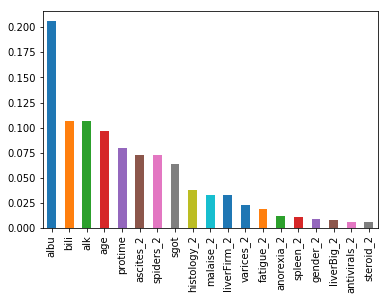

In [50]:
feat_importances_ordered = feat_importances.nlargest(19)
feat_importances_ordered.plot(kind='bar')

## Random Forest Tuning with RandomizedSearchCV

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

## n_jobs = -1 uses all cores of processor
## max_features is the maximum number of attributes to select for each tree
rfc_grid = RandomForestClassifier(n_jobs=-1, max_features='sqrt', class_weight='balanced_subsample')
 
# Use a grid over parameters of interest
## n_estimators is the number of trees in the forest
## max_depth is how deep each tree can be
## min_sample_leaf is the minimum samples required in each leaf node for the root node to split
## "A node will only be split if in each of it's leaf nodes there should be min_sample_leaf"

param_grid = {"n_estimators" : [10, 25, 50, 75, 100],
           "max_depth" : [10, 12, 14, 16, 18, 20],
           "min_samples_leaf" : [5, 10, 15, 20],
           "class_weight" : ['balanced','balanced_subsample']}
 
rfc_cv_grid = RandomizedSearchCV(estimator = rfc_grid, param_distributions = param_grid, cv = 3, n_iter=10)

In [52]:
%time rfc_cv_grid.fit(X_train, y_train)

CPU times: user 4.3 s, sys: 673 ms, total: 4.97 s
Wall time: 11.3 s


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [10, 25, 50, 75, 100], 'max_depth': [10, 12, 14, 16, 18, 20], 'min_samples_leaf': [5, 10, 15, 20], 'class_weight': ['balanced', 'balanced_subsample']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [53]:
rfc_cv_grid.best_params_
#rfc_cv_grid.best_estimator_

{'n_estimators': 75,
 'min_samples_leaf': 5,
 'max_depth': 18,
 'class_weight': 'balanced'}

In [54]:
## Predict
train_predictions = rfc_cv_grid.predict(X_train)
test_predictions = rfc_cv_grid.predict(X_test)

print("TRAIN DATA ACCURACY",accuracy_score(y_train,train_predictions))
print("\nTrain data f1-score for class '1'",f1_score(y_train,train_predictions,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(y_train,train_predictions,pos_label=2))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,test_predictions))
print("\nTest data f1-score for class '1'",f1_score(y_test,test_predictions,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(y_test,test_predictions,pos_label=2))

TRAIN DATA ACCURACY 0.8951612903225806

Train data f1-score for class '1' 0.7936507936507936

Train data f1-score for class '2' 0.9297297297297297


--------------------------------------


TEST DATA ACCURACY 0.7419354838709677

Test data f1-score for class '1' 0.42857142857142855

Test data f1-score for class '2' 0.8333333333333333


### Important Features for Random Forest CV Grid Search

In [55]:
rfc_cv_grid.best_estimator_.feature_importances_

array([0.07678882, 0.1852945 , 0.06246728, 0.04216115, 0.17528999,
       0.07030769, 0.00501819, 0.00426238, 0.00073033, 0.01909601,
       0.04306269, 0.00618095, 0.00903007, 0.00738856, 0.0238428 ,
       0.12096373, 0.05890658, 0.01711118, 0.07209711])

In [56]:
## Get important Features
feat_importances = pd.Series(rfc_cv_grid.best_estimator_.feature_importances_, index = X_train.columns)

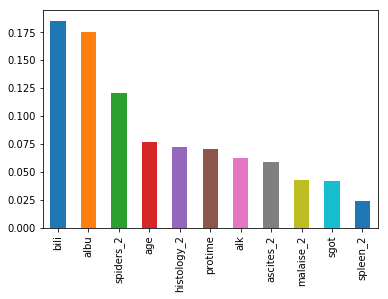

In [57]:
feat_importances_ordered = feat_importances.nlargest(11)
feat_importances_ordered.plot(kind='bar')

## C. Stacking Model

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [59]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train,y_train)

y_pred_train_dtc = dtc.predict(X_train)
y_pred_test_dtc = dtc.predict(X_test)

In [60]:
lrc = LogisticRegression()

lrc.fit(X_train,y_train)

y_pred_train_lrc = lrc.predict(X_train)
y_pred_test_lrc = lrc.predict(X_test)

In [61]:
knn = KNeighborsClassifier(n_neighbors=5)  

knn.fit(X_train, y_train)

y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

Let us take mode of the above predictions

In [62]:
from scipy.stats import mode

In [63]:
stack_train = np.array([y_pred_train_dtc,y_pred_train_lrc,y_pred_train_knn]).T
stacked_pred_train = mode(stack_train,axis=1)[0]

In [64]:
stack_test = np.array([y_pred_test_dtc,y_pred_test_lrc,y_pred_test_knn]).T
stacked_pred_test = mode(stack_test,axis=1)[0]

In [65]:
## Predict
train_predictions = rfc_cv_grid.predict(X_train)
test_predictions = rfc_cv_grid.predict(X_test)

print("TRAIN DATA ACCURACY",accuracy_score(y_train,stacked_pred_train))
print("\nTrain data f1-score for class '1'",f1_score(y_train,stacked_pred_train,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(y_train,stacked_pred_train,pos_label=2))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,stacked_pred_test))
print("\nTest data f1-score for class '1'",f1_score(y_test,stacked_pred_test,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(y_test,stacked_pred_test,pos_label=2))

TRAIN DATA ACCURACY 0.9274193548387096

Train data f1-score for class '1' 0.8163265306122449

Train data f1-score for class '2' 0.9547738693467337


--------------------------------------


TEST DATA ACCURACY 0.8709677419354839

Test data f1-score for class '1' 0.5

Test data f1-score for class '2' 0.9259259259259259


## D. Build Gradient Boosting Classifier

Gradient boosting is a type of boosting. 

The key idea behind gradient boosting is to set the target outcomes for this next model in order to minimize the error. The target outcome for each case in the data set depends on how much a change in that case’s prediction impacts the overall prediction error.

If, for case X(i), a small change in the prediction causes a large drop in error, then the next target outcome is a high value. Predictions from the new model that are close to its targets will reduce the error.

If, for case X(j), a small change in the prediction causes no change in error, then the next target outcome is zero because changing this prediction does not decrease the error.

The name gradient boosting arises because of setting target outcomes based on the gradient of the error with respect to the prediction of each case. Each new model takes a step in the direction that minimizes prediction error, in the space of possible predictions for each training case.

1. Initialize the outcome
2. Iterate from 1 to total number of trees
  <br>2.1 Update the weights for targets based on previous run (higher for the ones mis-classified)
  <br>2.2 Fit the model on selected subsample of data
  <br>2.3 Make predictions on the full set of observations
  <br>2.4 Update the output with current results taking into account the learning rate
3. Return the final output.

#### Create Gradient Boosting Classifier

The most important parameters are learning_rate, n_estimators and subsample
- **learning_rate**
    -  This determines the impact of each tree on the final outcome (step 2.4). GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates.
    -  Lower values are generally preferred as they make the model robust to the specific characteristics of tree and thus allowing it to generalize well.
    -  Lower values would require higher number of trees to model all the relations and will be computationally expensive.
- **n_estimators**
    -  The number of sequential trees to be modeled (step 2)
    -  Though GBM is fairly robust at higher number of trees but it can still overfit at a point. Hence, this should be tuned using CV for a particular learning rate.
- **subsample**
    -  The fraction of observations to be selected for each tree. Selection is done by random sampling.
    -  Values slightly less than 1 make the model robust by reducing the variance.
    -  Typical values ~0.8 generally work fine but can be fine-tuned further.

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
GBM_model = GradientBoostingClassifier(n_estimators=50,
                                       learning_rate=0.3,
                                       subsample=0.8)

#### Train Gradient Boosting Classifer

In [68]:
%time GBM_model.fit(X=X_train, y=y_train)

CPU times: user 54.7 ms, sys: 0 ns, total: 54.7 ms
Wall time: 53.8 ms


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False)

#### Predictions on Test set

In [69]:
## Predict
train_predictions = GBM_model.predict(X_train)
test_predictions = GBM_model.predict(X_test)

print("TRAIN DATA ACCURACY",accuracy_score(y_train,stacked_pred_train))
print("\nTrain data f1-score for class '1'",f1_score(y_train,stacked_pred_train,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(y_train,stacked_pred_train,pos_label=2))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,stacked_pred_test))
print("\nTest data f1-score for class '1'",f1_score(y_test,stacked_pred_test,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(y_test,stacked_pred_test,pos_label=2))

TRAIN DATA ACCURACY 0.9274193548387096

Train data f1-score for class '1' 0.8163265306122449

Train data f1-score for class '2' 0.9547738693467337


--------------------------------------


TEST DATA ACCURACY 0.8709677419354839

Test data f1-score for class '1' 0.5

Test data f1-score for class '2' 0.9259259259259259


### GridSearch Cross validation for GBM

#### Create Gradient Boosting Classifier

In [70]:
from sklearn.model_selection import GridSearchCV

# Model in use
GBM = GradientBoostingClassifier() 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [100,150,200,250],
           "max_depth" : [5, 10],
           "learning_rate" : [0.1,0.5,0.9]}
 
CV_GBM = GridSearchCV(estimator=GBM, param_grid=param_grid)

#### Train Gradient Boosting Classifier

In [71]:
%time CV_GBM.fit(X=X_train, y=y_train)

CPU times: user 3.28 s, sys: 0 ns, total: 3.28 s
Wall time: 3.28 s


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 150, 200, 250], 'max_depth': [5, 10], 'learning_rate': [0.1, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [72]:
CV_GBM.grid_scores_

[mean: 0.77419, std: 0.02176, params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100},
 mean: 0.77419, std: 0.02176, params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150},
 mean: 0.77419, std: 0.02176, params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200},
 mean: 0.77419, std: 0.03098, params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250},
 mean: 0.75000, std: 0.06023, params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100},
 mean: 0.75806, std: 0.06515, params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150},
 mean: 0.75000, std: 0.06023, params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200},
 mean: 0.75000, std: 0.06023, params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 250},
 mean: 0.79032, std: 0.01049, params: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100},
 mean: 0.78226, std: 0.03564, params: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 150},
 mean:

#### Best parameters set and model

In [73]:
# Find best model
best_gbm_model = CV_GBM.best_estimator_
print (CV_GBM.best_score_, CV_GBM.best_params_)

0.7983870967741935 {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}


#### Predictions on Test set

In [74]:
## Predict
train_predictions = CV_GBM.predict(X_train)
test_predictions = CV_GBM.predict(X_test)

print("TRAIN DATA ACCURACY",accuracy_score(y_train,stacked_pred_train))
print("\nTrain data f1-score for class '1'",f1_score(y_train,stacked_pred_train,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(y_train,stacked_pred_train,pos_label=2))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,stacked_pred_test))
print("\nTest data f1-score for class '1'",f1_score(y_test,stacked_pred_test,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(y_test,stacked_pred_test,pos_label=2))

TRAIN DATA ACCURACY 0.9274193548387096

Train data f1-score for class '1' 0.8163265306122449

Train data f1-score for class '2' 0.9547738693467337


--------------------------------------


TEST DATA ACCURACY 0.8709677419354839

Test data f1-score for class '1' 0.5

Test data f1-score for class '2' 0.9259259259259259


## E. Build XGBOOST Classifier
XGBoost (eXtreme Gradient Boosting) is an advanced implementation of gradient boosting algorithm.
#### The XGBoost Advantage
-  Regularization:
    -  Standard GBM implementation has no regularization like XGBoost, therefore it also helps to reduce overfitting.
    -  In fact, XGBoost is also known as ‘regularized boosting‘ technique.
-  Parallel Processing:
    -  XGBoost implements parallel processing and is blazingly faster as compared to GBM.
    -  Boosting is sequential process that each tree can be built only after the previous one, and it  can be parallelized with making a tree using all cores. Refer. http://zhanpengfang.github.io/418home.html
    
    -  XGBoost also supports implementation on Hadoop.
-  High Flexibility
    -  XGBoost allow users to define custom optimization objectives and evaluation criteria.
    -  This adds a whole new dimension to the model and there is no limit to what we can do.
-  Handling Missing Values
    -  XGBoost has an in-built routine to handle missing values.
    -  User is required to supply a different value than other observations and pass that as a parameter. XGBoost tries different things as it encounters a missing value on each node and learns which path to take for missing values in future.
-  Tree Pruning:
    -  A GBM would stop splitting a node when it encounters a negative loss in the split. Thus it is more of a greedy algorithm.
    -  XGBoost on the other hand make splits upto the max_depth specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain.
    -  Another advantage is that sometimes a split of negative loss say -2 may be followed by a split of positive loss +10. GBM would stop as it encounters -2. But XGBoost will go deeper and it will see a combined effect of +8 of the split and keep both.
-  Built-in Cross-Validation
    -  XGBoost allows user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.
    -  This is unlike GBM where we have to run a grid-search and only a limited values can be tested.
-  Continue on Existing Model
    -  User can start training an XGBoost model from its last iteration of previous run. This can be of significant advantage in certain specific applications.
    -  GBM implementation of sklearn also has this feature so they are even on this point.

#### Create XGBoost Classifier

There are different hyperparameters that we can tune and the parametres are different from baselearner to baselearner. 
<br>In tree based learners, which are the most common ones in xgboost applications, the following are the most commonly tuned hyperparameters:

-  **learning rate/eta:** governs how quickly the model fits the residual error using additional base learners. If it is a smaller learning rate, it will need more boosting rounds, hence more time, to achieve the same reduction in residual error as one with larger learning rate. Typically, it lies between 0.01 – 0.3
-  **max_depth:** max depth per tree. This controls how deep our tree can grow. The Larger the depth, more complex the model will be and higher chances of overfitting. Larger data sets require deep trees to learn the rules from data. Default = 6.
-  **subsample:** % samples used per tree. This is the fraction of the total training set that can be used in any boosting round. Low value may lead to underfitting issues. A very high value can cause over-fitting problems.
-  **colsample_bytree:** % features used per tree. This is the fraction of the number of columns that we can use in any boosting round. A smaller value is an additional regularization and a larger value may be cause overfitting issues.
-  **n_estimators:** number of estimators (base learners). This is the number of boosting rounds.
<br><br>The three hyperparameters below are regularization hyperparameters.
-  **gamma:** min loss reduction to create new tree split. default = 0 means no regularization.
-  **lambda:** L2 reg on leaf weights. Equivalent to Ridge regression.
-  **alpha:** L1 reg on leaf weights. Equivalent to Lasso regression.


Refer: https://xgboost.readthedocs.io/en/latest/python/python_api.html

#### Installing the Xgboost module

#!pip install xgboost

In [75]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()

#### Train XGBoost Classifer

In [76]:
%time XGB_model.fit(X_train, y_train)

CPU times: user 38 ms, sys: 4.15 ms, total: 42.2 ms
Wall time: 41.1 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

#### Predictions on Test set

In [77]:
## Predict
train_predictions = XGB_model.predict(X_train)
test_predictions = XGB_model.predict(X_test)

print("TRAIN DATA ACCURACY",accuracy_score(y_train,stacked_pred_train))
print("\nTrain data f1-score for class '1'",f1_score(y_train,stacked_pred_train,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(y_train,stacked_pred_train,pos_label=2))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,stacked_pred_test))
print("\nTest data f1-score for class '1'",f1_score(y_test,stacked_pred_test,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(y_test,stacked_pred_test,pos_label=2))

TRAIN DATA ACCURACY 0.9274193548387096

Train data f1-score for class '1' 0.8163265306122449

Train data f1-score for class '2' 0.9547738693467337


--------------------------------------


TEST DATA ACCURACY 0.8709677419354839

Test data f1-score for class '1' 0.5

Test data f1-score for class '2' 0.9259259259259259


### GridSearch Cross validation for XGB

#### Create XGBoost Classifier

In [78]:
XGB = XGBClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 5),
     'n_estimators':[100, 200],
     'max_depth': [10, 15, 20, 25]
}

 
CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv= 10)

#### Train XGBoost Classifer

In [79]:
%time CV_XGB.fit(X = X_train, y=y_train)

CPU times: user 11.9 s, sys: 250 ms, total: 12.2 s
Wall time: 12.2 s


GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]), 'n_estimators': [100, 200], 'max_depth': [10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### Best parameters set and model

In [80]:
# Find best model
best_xgb_model = CV_XGB.best_estimator_
print (CV_XGB.best_score_, CV_XGB.best_params_)

0.8145161290322581 {'colsample_bytree': 0.6, 'max_depth': 10, 'n_estimators': 100}


#### Predictions on Test set

In [81]:
## Predict
train_predictions = CV_XGB.predict(X_train)
test_predictions = CV_XGB.predict(X_test)

print("TRAIN DATA ACCURACY",accuracy_score(y_train,stacked_pred_train))
print("\nTrain data f1-score for class '1'",f1_score(y_train,stacked_pred_train,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(y_train,stacked_pred_train,pos_label=2))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,stacked_pred_test))
print("\nTest data f1-score for class '1'",f1_score(y_test,stacked_pred_test,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(y_test,stacked_pred_test,pos_label=2))

TRAIN DATA ACCURACY 0.9274193548387096

Train data f1-score for class '1' 0.8163265306122449

Train data f1-score for class '2' 0.9547738693467337


--------------------------------------


TEST DATA ACCURACY 0.8709677419354839

Test data f1-score for class '1' 0.5

Test data f1-score for class '2' 0.9259259259259259


## F. Adapative Boosting (AdaBoost)

It combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations. Any machine learning algorithm can be used as base classifier if it accepts weights on the training set. Adaboost should meet two conditions:

The classifier should be trained interactively on various weighed training examples.
In each iteration, it tries to provide an excellent fit for these examples by minimizing training error.
How does the AdaBoost algorithm work?

It works in the following steps:
1. Initially, Adaboost selects a training subset randomly.
2. It iteratively trains the AdaBoost machine learning model by selecting the training set based on the accurate prediction of the last training.
3. It assigns the higher weight to wrong classified observations so that in the next iteration these observations will get the high probability for classification.
4. Also, It assigns the weight to the trained classifier in each iteration according to the accuracy of the classifier. The more accurate classifier will get high weight.
5. This process iterate until the complete training data fits without any error or until reached to the specified maximum number of estimators.
6. To classify, perform a "vote" across all of the learning algorithms you built.

Reference: https://www.datacamp.com/community/tutorials/adaboost-classifier-python

In [82]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()

In [83]:
%time adaboost.fit(X_train, y_train)

CPU times: user 73.3 ms, sys: 7.78 ms, total: 81.1 ms
Wall time: 80.7 ms


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

#### Predictions on Test set

In [84]:
## Predict
train_predictions = adaboost.predict(X_train)
test_predictions = adaboost.predict(X_test)

print("TRAIN DATA ACCURACY",accuracy_score(y_train,stacked_pred_train))
print("\nTrain data f1-score for class '1'",f1_score(y_train,stacked_pred_train,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(y_train,stacked_pred_train,pos_label=2))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,stacked_pred_test))
print("\nTest data f1-score for class '1'",f1_score(y_test,stacked_pred_test,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(y_test,stacked_pred_test,pos_label=2))

TRAIN DATA ACCURACY 0.9274193548387096

Train data f1-score for class '1' 0.8163265306122449

Train data f1-score for class '2' 0.9547738693467337


--------------------------------------


TEST DATA ACCURACY 0.8709677419354839

Test data f1-score for class '1' 0.5

Test data f1-score for class '2' 0.9259259259259259


### GridSearch Cross validation for XGB

#### Create XGBoost Classifier

In [85]:
adaboost = AdaBoostClassifier()
 
# Use a grid over parameters of interest
param_grid = {
     'n_estimators':[100, 200],
     'learning_rate': [0.01, 0.1, 1, 10]
}

 
CV_ada = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv= 10)

#### Train XGBoost Classifer

In [86]:
%time CV_ada.fit(X = X_train, y=y_train)

CPU times: user 15.5 s, sys: 3.24 ms, total: 15.5 s
Wall time: 15.5 s


GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### Best parameters set and model

In [87]:
# Find best model
print (CV_ada.best_score_, CV_ada.best_params_)

0.8629032258064516 {'learning_rate': 0.1, 'n_estimators': 200}


#### Predictions on Test set

In [88]:
## Predict
train_predictions = CV_ada.predict(X_train)
test_predictions = CV_ada.predict(X_test)

print("TRAIN DATA ACCURACY",accuracy_score(y_train,stacked_pred_train))
print("\nTrain data f1-score for class '1'",f1_score(y_train,stacked_pred_train,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(y_train,stacked_pred_train,pos_label=2))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,stacked_pred_test))
print("\nTest data f1-score for class '1'",f1_score(y_test,stacked_pred_test,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(y_test,stacked_pred_test,pos_label=2))

TRAIN DATA ACCURACY 0.9274193548387096

Train data f1-score for class '1' 0.8163265306122449

Train data f1-score for class '2' 0.9547738693467337


--------------------------------------


TEST DATA ACCURACY 0.8709677419354839

Test data f1-score for class '1' 0.5

Test data f1-score for class '2' 0.9259259259259259
